
<a id='optgrowth'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Crescimento Ótimo I: O Modelo de Crescimento Ótimo Estocástico

## Conteúdo

- [Crescimento Ótimo I: O Modelo de Crescimento Ótimo Estocástico](#Crescimento-Ótimo-I:-O-Modelo-de-Crescimento-Ótimo-Estocástico)  
  - [Resumo](#Resumo)  
  - [O Modelo](#O-Modelo)  
  - [Computação](#Computação)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*


## Resumo

Nesta aula, estudaremos um simples modelo de crescimento ótimo com um agente.

O modelo é uma versão do modelo de crescimento padrão de horizonte infinito de um setor estudado em:

- [[SLP89]](https://julia.quantecon.org/../zreferences.html#stokeylucas1989), capítulo 2.  
- [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012), seção 3.1.  
- [EDTC](http://johnstachurski.net/edtc.html), capítulo 1.  
- [[Sun96]](https://julia.quantecon.org/../zreferences.html#sundaram1996), capítulo 12.  


A técnica que usamos para resolver o modelo é programação dinâmica.

Nosso tratamento da programação dinâmica segue os tratamentos anteriores em nossas aulas sobre [Caminhos Mais Curtos](https://julia.quantecon.org/short_path.html) e
[Pesquisa de Emprego](https://julia.quantecon.org/mccall_model.html).

Discutiremos alguns dos detalhes técnicos da programação dinâmica à medida que avançamos.

## O Modelo


<a id='index-1'></a>
Considere um agente que possui uma quantidade $ y_t \in \mathbb R_+ := [0, \infty) $ de um consumo de um bem no momento $ t $.

Esse produto pode ser consumido ou investido.

Quando o bem é investido, ele é transformado automaticamente em capital.

O estoque de capital resultante, denotado aqui por $ k_{t+1} $, será usado para produção.

A produção é estocástica, na medida em que também depende de um choque $ \xi_{t+1} $ realizado no fim do período atual.

A produção para o próximo período é:

$$
y_{t+1} := f(k_{t+1}) \xi_{t+1}
$$

onde $ f \colon \mathbb{R}_+ \to \mathbb{R}_+ $ é chamada de função de produção.

A restrição de orcamentária (recurso) é:


<a id='equation-outcsdp0'></a>
$$
k_{t+1} + c_t \leq y_t \tag{1}
$$

e todas as variáveis são requeridas para ser não-negativas.

### Suposições e Comentários

No que segue:

- A sequência $ \{\xi_t\} $ é assumida ser IID.  
- A distribuição comum de cada $ \xi_t $ será denotada por $ \phi $.  
- A função de produção $ f $ é assumida como crescente e contínua.  
- A depreciação do capital não é explicitada, mas pode ser incorporada à função de produção.  


Enquanto muitos outros tratamentos do modelo de crescimento estocástico usam $ k_t $ como variável de estado, usaremos $ y_t $.

Isso nos permitirá tratar um modelo estocástico, mantendo apenas uma variável de estado.

Consideramos estados alternativos e especificações de tempo em algumas de nossas outras palestras.

### Otimização

Tomando $ y_0 $ como dado, o agente deseja maximizar:


<a id='equation-texs0-og2'></a>
$$
\mathbb E \left[ \sum_{t = 0}^{\infty} \beta^t u(c_t) \right] \tag{2}
$$

sujeito a,


<a id='equation-og-conse'></a>
$$
y_{t+1} = f(y_t - c_t) \xi_{t+1}
\quad \text{e} \quad
0 \leq c_t \leq y_t
\quad \text{para todos } t \tag{3}
$$

onde:

- $ u $ é uma função de utilidade limitada, contínua e estritamente crescente, e
- $ \beta \in (0, 1) $ é um fator de desconto.


Em [(3)](#equation-og-conse) estamos assumindo que a restrição de recursos [(1)](#equation-outcsdp0) se mantém com igualdade - o que é razoável porque $ u $ está aumentando estritamente e nenhum produto será desperdiçado no ponto ótimo.

Em resumo, o objetivo agente é selecionar um caminho $ c_0, c_1, c_2, \ldots $ para o consumo que é:

1. não-negativo,  
1. factível no sentido de [(1)](#equation-outcsdp0),  
1. ótimo, no sentido que maximiza [(2)](#equation-texs0-og2) em relação a todas as outras sequências de consumo viáveis, e  
1. *adaptado*, no sentido de que a ação $ c_t $ depende apenas de resultados observáveis, não de resultados futuros, como $ \xi_{t+1} $  


No contexto presente:

- $ y_t $ é chamado de variável de *estado* — isso resume o “estado do mundo” o início de cada período.  
- $ c_t $ é chamado de variável de *controle* — um valor escolhido pelo agente a cada período após observar o *estado*.  

### A Abordagem da Função de Política


<a id='index-2'></a>
Um jeito de pensar a respeito de resolver esse problema é olhar para a melhor **função de política**.

Uma função de política é um mapa para o passado e presentes observáveis dentro de uma ação atual.

Estaremos particularmente interessados nas **políticas de Markov**, que são mapas para atuais estados $ y_t $ em uma ação atual $ c_t $.

Para problemas de programação dinâmica tal como esse (em fato para qualquer [processo de decisão de Markov](https://en.wikipedia.org/wiki/Markov_decision_process)), a política ótima é sempre uma política de Markov.

Em outras palavras, o estado atual $ y_t $ fornece uma estatística suficiente
para a história em termos de tomar uma decisão ideal hoje.

Isso é bastante intuitivo, mas se você desejar, poderá encontrar provas em textos como [[SLP89]](https://julia.quantecon.org/../zreferences.html#stokeylucas1989) (seção 4.1).

A seguir, nos concentramos em encontrar a melhor política de Markov.

Em nosso contexto, uma política de Markov é uma função  $ \sigma \colon
\mathbb R_+ \to \mathbb R_+ $, com o entendimento de que os estados são mapeados para ações via:

$$
c_t = \sigma(y_t) \quad \text{para todo } t
$$

No que segue, chamaremos $ \sigma $ de uma *política de consumo factível* se satisfazer:


<a id='equation-idp-fp-og2'></a>
$$
0 \leq \sigma(y) \leq y
\quad \text{para todo} \quad
y \in \mathbb R_+ \tag{4}
$$

Em outras palavras, uma política de consumo factível é uma política de Markov que respeita a restrição de recurso.

O conjunto de todas a políticas factíveis será denotado por $ \Sigma $.

Cada $ \sigma \in \Sigma $ determina um [processo contínuo de estado de Markov](https://julia.quantecon.org/../tools_and_techniques/stationary_densities.html) $ \{y_t\} $ para o produto via:


<a id='equation-firstp0-og2'></a>
$$
y_{t+1} = f(y_t - \sigma(y_t)) \xi_{t+1},
\quad y_0 \text{ dado} \tag{5}
$$

Esse é o caminho do tempo para o produto quando escolhemos e mantemos a política $ \sigma $.

Inserimos esse processo dentro de uma função objetivo para obter:


<a id='equation-texss'></a>
$$
\mathbb E
\left[ \,
\sum_{t = 0}^{\infty} \beta^t u(c_t) \,
\right] =
\mathbb E
\left[ \,
\sum_{t = 0}^{\infty} \beta^t u(\sigma(y_t)) \,
\right] \tag{6}
$$

Este é o valor presente total esperado da seguinte política $ \sigma $ para sempre,
dada a renda inicial $ y_0 $.

O objetivo é selecionar uma política que torne esse número o maior possível.

A próxima seção aborda essas idéias de maneira mais formal.

### Ótimo

A **função de valor da política** $ v_{\sigma} $ associada com uma dada política $ \sigma $ é o mapeamento definido por:


<a id='equation-vfcsdp00'></a>
$$
v_{\sigma}(y) = \mathbb E \left[ \sum_{t = 0}^{\infty} \beta^t u(\sigma(y_t)) \right] \tag{7}
$$

quando $ \{y_t\} $ é dado por [(5)](#equation-firstp0-og2) com $ y_0 = y $.

Em outras palavras, é o valor da vida útil da política a seguir  $ \sigma $
começando na condição inicial $ y $.

A **função de valor** é então definida como:


<a id='equation-vfcsdp0'></a>
$$
v^*(y) := \sup_{\sigma \in \Sigma} \; v_{\sigma}(y) \tag{8}
$$

A função de valor fornece o valor máximo que pode ser obtido do estado $ y $, após considerar todas as políticas factíveis.

Uma política $ \sigma \in \Sigma $ é chamada de **ideal** se atingir o supremo em [(8)](#equation-vfcsdp0) para todos $ y \in \mathbb R_+ $.

### A Equação de Bellman

Com nossas suposições sobre função de utilidade e produção, a função de valor conforme definida em, a função de valor como definida em [(8)](#equation-vfcsdp0) também satisfaz uma **equação de Bellman**.

Para esse problema, a equação de Bellman possui a seguinte forma:


<a id='equation-fpb30'></a>
$$
w(y) = \max_{0 \leq c \leq y}
    \left\{
        u(c) + \beta \int w(f(y - c) z) \phi(dz)
    \right\}
\qquad (y \in \mathbb R_+) \tag{9}
$$

Isso é uma *equação funcional em* $ w $.

O termo $ \int w(f(y - c) z) \phi(dz) $ pode ser entendido como o valor esperado para o próximo período quando:

- $ w $ é usado para medir o valor. 
- o estado é $ y $.  
- o consumo está definido como $ c $.  


Como mostrado em [EDTC](http://johnstachurski.net/edtc.html), teorema 10.1.11 e em uma variedade de outros textos.

> *A função de valor* $ v^* $ *satisfaz a equação de Bellman*.


Em outras palavras, [(9)](#equation-fpb30) é válido quando $ w=v^* $.

A intuição é que o valor máximo de um determinado estado pode ser obtido através da troca ideal.

- recompensa atual de uma determinada ação, vs  
- valor futuro descontado esperado do estado resultante dessa ação


A equação de Bellman é importante porque nos fornece mais informações sobre a função de valor.

Também sugere uma maneira de calcular a função de valor, que discutiremos abaixo.

### Políticas Gananciosas

A importância principal da função de valor é que podemos usá-la para calcular políticas ideais.

Os detalhes são os seguintes.

Dada uma função contínua $ w $ em $ \mathbb R_+ $, dizemos que $ \sigma \in \Sigma $ é $ w $-**ganacioso** se $ \sigma(y) $ é uma solução para:


<a id='equation-defgp20'></a>
$$
\max_{0 \leq c \leq y}
    \left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
    \right\} \tag{10}
$$

para todo $ y \in \mathbb R_+ $.

Em outras palavras, $ \sigma \in \Sigma $ é $ w $-ganacioso se otimizar as recompensas atuais e futuras quando $ w $  é considerado a função de valor.

Em nosso cenário, temos o seguinte resultado principal.

> *Uma política de consumo viável é ideal se e somente se for* $ v^* $-*ganancioso*


A intuição é semelhante à intuição para a equação de Bellman, que foi fornecida após [(9)](#equation-fpb30).

Veja, por exemplo, o teorema 10.1.11 do  [EDTC](http://johnstachurski.net/edtc.html).

Portanto, uma vez que tenhamos uma boa aproximação de $ v^* $, podemos calcular a política (aproximadamente) ideal calculando a política gananciosa correspondente.

A vantagem é que agora estamos resolvendo um problema de otimização dimensional muito menor.

### O Operador de Bellman

Como, então, devemos calcular a função de valor?

Uma maneira é usar o chamado **operador de Bellman**.

(Um operador é um mapa que envia funções para funções)

O operador Bellman é indicado por $ T $ e definido por:


<a id='equation-fcbell20-optgrowth'></a>
$$
Tw(y) := \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
\right\}
\qquad (y \in \mathbb R_+) \tag{11}
$$

Em outras palavras, $ T $ envia a função $ w $ para a nova função
$ Tw $ definida [(11)](#equation-fcbell20-optgrowth).

Por construção, o conjunto de soluções para equação de Bellman [(9)](#equation-fpb30) *coincide exatamente com* o conjunto de pontos fixos de $ T $.

Por exemplo, se $ Tw = w $, então, para qualquer $ y \geq 0 $,

$$
w(y)
= Tw(y)
= \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int v^*(f(y - c) z) \phi(dz)
\right\}
$$

Que diz precisamente que $ w $ é uma solução para equação de Bellman.

Segue que $ v^* $ é um ponto fixo de $ T $.

### Revisão dos Resultados Teóricos


<a id='index-3'></a>
Pode-se também mostrar que $ T $ é um mapeamento de contração no conjunto de funções limitadas contínuas em $ \mathbb R_+ $ sob a distância suprema:

$$
\rho(g, h) = \sup_{y \geq 0} |g(y) - h(y)|
$$

Veja [EDTC](http://johnstachurski.net/edtc.html), lema 10.1.18.

Portanto, ele tem exatamente um ponto fixo neste conjunto, que sabemos que é igual à função de valor.

Segue que:

- A função de valor $ v^* $ é limitada e contínua.  
- A partir de qualquer $ w $ limitado e contínuo, a sequência $ w, Tw, T^2 w, \ldots $ gerada por iteratividade $ T $ converge uniformente para $ v^* $.  


Esse método iterativo é chamado de **função de valor iteração**.

Também sabemos que uma política factível é ótima se e somente se for $ v^* $-ganacioso.

Não é muito difícil mostrar que uma política $ v^* $-ganancioso existe (veja [EDTC](http://johnstachurski.net/edtc.html), teorema 10.1.11 se você ficar estagnado).

Portanto, existe pelo menos uma política ótima.

Nosso problema agora é como calculá-lo.

### Utilidade Ilimitada


<a id='index-5'></a>
Os resultados declarados acima assumem que a função de utilidade é limitada.

Na prática, os economistas geralmente trabalham com funções de utilidade ilimitadas - e nós também.

No cenário ilimitado, existem várias teorias de otimalidade.

Infelizmente, eles tendem a ser específicos de cada caso, em vez de válidos para uma grande variedade de aplicações.

No entanto, suas principais conclusões geralmente estão alinhadas com as declaradas para o caso delimitado logo acima (desde que descartemos a palavra “delimitado”).

Consulte, por exemplo, a seção 12.2 do [EDTC](http://johnstachurski.net/edtc.html), [[Kam12]](https://julia.quantecon.org/../zreferences.html#kamihigashi2012) ou [[MdRV10]](https://julia.quantecon.org/../zreferences.html#mv2010).

## Computação


<a id='index-6'></a>
Vamos agora analisar a função de valor e a política ideal.

### Iteração de Valor Ajustado


<a id='index-7'></a>
A primeira etapa é calcular a função de valor pela iteração da função de valor.

Em teoria, o algoritmo é o seguinte:

1. Comece com uma função $ w $ — uma condição inicial.  
1. Resolvendo [(11)](#equation-fcbell20-optgrowth), obtemos a função $ T w $.  
1. A menos que alguma condição de parada seja satisfeita, defina $ w = Tw $ e vá para o passo 2.  


Isso gera a sequência $ w, Tw, T^2 w, \ldots $.

No entanto, há um problema que devemos enfrentar antes de implementar este procedimento: As iterações não podem ser calculadas exatamente nem armazenadas em um computador.

Para ver o problema, considere [(11)](#equation-fcbell20-optgrowth).

Mesmo se $ w $ for uma função conhecida, a menos que  $ Tw $ possa ser demonstrado que possui uma estrutura especial, a única maneira de armazená-la é registrar o valor $ Tw(y) $ para todo $ y \in \mathbb R_+ $.

Claramente isso é impossível.

O que faremos é usar a **iteração da função de valor ajustado**.

O procedimento é registrar o valor da função $ Tw $ apenas em muitos pontos finitos do “grid”  $ y_1 < y_2 < \cdots < y_I $ e reconstruir ele a partir dessas informações, quando necessário.

Mais precisamente, o algoritmo será:


<a id='fvi-alg'></a>
1. Comece com uma matriz de valores  $ \{ w_1, \ldots, w_I \} $ representando os valores de alguma função inicial $ w $ nos pontos do grid $ \{ y_1, \ldots, y_I \} $.  
1. Construa uma função $ \hat w $ no espaço de estado $ \mathbb R_+ $ por interpolação ou aproximação, com base nesses pontos de dados.
1. Obtenha e grave o valor $ T \hat w(y_i) $ em cada ponto do grid $ y_i $ resolvendo repetidamente [(11)](#equation-fcbell20-optgrowth).  
1. A menos que alguma condição de parada seja satisfeita, defina  $ \{ w_1, \ldots, w_I \} = \{ T \hat w(y_1), \ldots, T \hat w(y_I) \} $ e vá para o passo2.  


Como devemos dar o passo 2?

Este é um problema de aproximação de funções e há muitas maneiras de abordá-lo.

O importante aqui é que o esquema de aproximação de funções não deve apenas produzir uma boa aproximação de $ Tw $, mas também combinar bem com o algoritmo de iteração mais amplo descrito acima.

Uma boa escolha de ambos os aspectos é a interpolação linear por partes contínua (consulte <a href=../_static/pdfs/3ndp.pdf download>esse artigo</a> para discussão adicional).

A figura a seguir ilustra a interpolação linear por partes de uma função arbitrária nos pontos do grid  $ 0, 0.2, 0.4, 0.6, 0.8, 1 $.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using Plots, QuantEcon, Interpolations, NLsolve, Optim, Random

In [3]:
using Plots, QuantEcon, Interpolations, NLsolve
gr(fmt = :png);

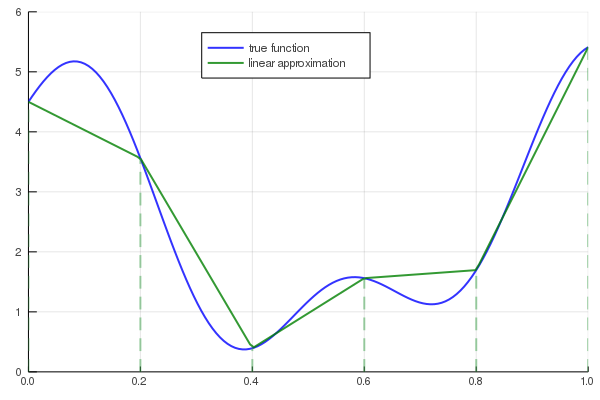

In [4]:
f(x) = 2 .* cos.(6x) .+ sin.(14x) .+ 2.5
c_grid = 0:.2:1
f_grid = range(0,  1, length = 150)

Af = LinearInterpolation(c_grid, f(c_grid))

plt = plot(xlim = (0,1), ylim = (0,6))
plot!(plt, f, f_grid, color = :blue, lw = 2, alpha = 0.8, label = "true function")
plot!(plt, f_grid, Af.(f_grid), color = :green, lw = 2, alpha = 0.8,
      label = "linear approximation")
plot!(plt, f, c_grid, seriestype = :sticks, linestyle = :dash, linewidth = 2, alpha = 0.5,
      label = "")
plot!(plt, legend = :top)

Outra vantagem da interpolação linear por partes é que ela preserva propriedades úteis da forma, como monotonicidade e concavidade/convexidade.

### O Operador de Bellman

Aqui está uma função que implementa o operador Bellman usando interpolação linear:

In [5]:
using Optim

function T(w, grid, β, u, f, shocks, Tw = similar(w);
                          compute_policy = false)
    w_func = LinearInterpolation(grid, w)
    # objetivo para cada ponto do grid
    objectives = (c -> u(c) + β * mean(w_func.(f(y - c) .* shocks)) for y in grid_y)
    results = maximize.(objectives, 1e-10, grid_y) # resultado do solucionador para cada ponto do grid
    Tw = Optim.maximum.(results)
    if compute_policy
        σ = Optim.maximizer.(results)
        return Tw, σ
    end
    return Tw
end

T (generic function with 2 methods)

Observe que a expectativa em  [(11)](#equation-fcbell20-optgrowth) é computada via Monte Carlo, usando a aproximação:

$$
\int w(f(y - c) z) \phi(dz) \approx \frac{1}{n} \sum_{i=1}^n w(f(y - c) \xi_i)
$$

onde $ \{\xi_i\}_{i=1}^n $ são extrações IID de $ \phi $.

Monte Carlo nem sempre é a maneira mais eficiente de calcular integrais numericamente, mas possui algumas vantagens teóricas no cenário atual.

(Por exemplo, ele preserva a propriedade de mapeamento de contração do operador Bellman - veja, por exemplo [[PalS13]](https://julia.quantecon.org/../zreferences.html#pal2013))


<a id='benchmark-growth-mod'></a>

### Um Exemplo

Vamos testar o nosso operador quando:

- $ f(k) = k^{\alpha} $  
- $ u(c) = \ln c $  
- $ \phi $ é a distribuição de $ \exp(\mu + \sigma \zeta) $ quando $ \zeta $ é padrão normal. 


Como é sabido (consulte [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012), seção 3.1.2), para este problema em particular, uma solução analítica exata está disponível, com:


<a id='equation-dpi-tv'></a>
$$
v^*(y) =
\frac{\ln (1 - \alpha \beta) }{ 1 - \beta}
+
\frac{(\mu + \alpha \ln (\alpha \beta))}{1 - \alpha}
 \left[
     \frac{1}{1- \beta} - \frac{1}{1 - \alpha \beta}
 \right]
 +
 \frac{1}{1 - \alpha \beta} \ln y \tag{12}
$$

A política de consumo ótimo é:

$$
\sigma^*(y) = (1 - \alpha \beta ) y
$$

Vamos codificar isso agora, para que possamos testá-lo abaixo.

In [6]:
α = 0.4
β = 0.96
μ = 0
s = 0.1

c1 = log(1 - α * β) / (1 - β)
c2 = (μ + α * log(α * β)) / (1 - α)
c3 = 1 / (1 - β)
c4 = 1 / (1 - α * β)

# Utilidade
u(c) = log(c)

∂u∂c(c) = 1 / c

# Parte deterministica da função de produção
f(k) = k^α

f′(k) = α * k^(α - 1)

# verdadeira política ótima
c_star(y) = (1 - α * β) * y

# verdadeira função de valor
v_star(y) = c1 + c2 * (c3 - c4) + c4 * log(y)

v_star (generic function with 1 method)

### Um Primeiro Teste

Para testar nosso código, queremos ver se podemos replicar a solução analítica numericamente, usando a iteração da função de valor ajustado.

Precisamos de um grid e alguns choques para a integração de Monte Carlo.

In [7]:
using Random
Random.seed!(42) # Para resultados reproduzíveis.

grid_max = 4         # Maiores pontos do Grid
grid_size = 200      # Números de pontos do grid
shock_size = 250     # Número de choques na integral de Monte Carlo 

grid_y = range(1e-5,  grid_max, length = grid_size)
shocks = exp.(μ .+ s * randn(shock_size))

Agora vamos fazer alguns testes.

Como um teste preliminar, vamos ver o que acontece quando aplicamos nosso operador de Bellman à solução exata $ v^* $.

Em teoria, a função resultante deve ser novamente $ v^* $.

Na prática, esperamos algum pequeno erro numérico.

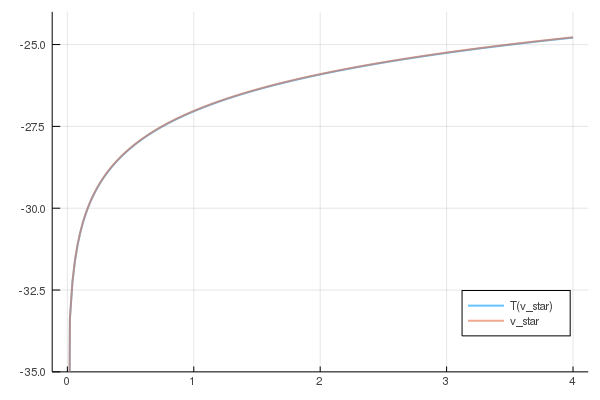

In [8]:
w = T(v_star.(grid_y), grid_y, β, log, k -> k^α, shocks)

plt = plot(ylim = (-35,-24))
plot!(plt, grid_y, w, linewidth = 2, alpha = 0.6, label = "T(v_star)")
plot!(plt, v_star, grid_y, linewidth = 2, alpha=0.6, label = "v_star")
plot!(plt, legend = :bottomright)

As duas funções são essencialmente indistinguíveis, então estamos começando bem.

Agora vamos dar uma olhada na iteração com o operador Bellman, partindo de uma condição inicial arbitrária.

A condição inicial com a qual começaremos é  $ w(y) = 5 \ln (y) $

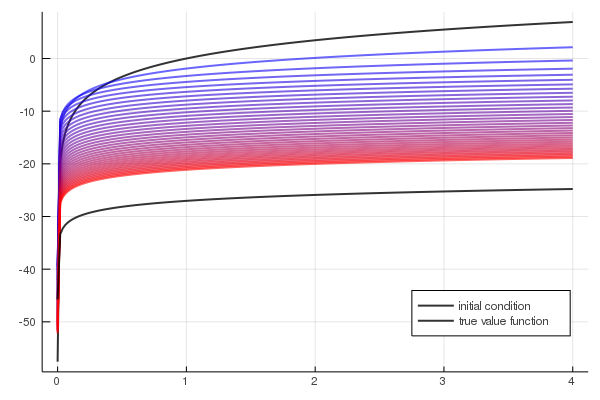

In [9]:
w = 5 * log.(grid_y)  # Uma condição inicial -- razoavelmente arbitrária
n = 35

plot(xlim = (extrema(grid_y)), ylim = (-50, 10))
lb = "initial condition"
plt = plot(grid_y, w, color = :black, linewidth = 2, alpha = 0.8, label = lb)
for i in 1:n
    w = T(w, grid_y, β, log, k -> k^α, shocks)
    plot!(grid_y, w, color = RGBA(i/n, 0, 1 - i/n, 0.8), linewidth = 2, alpha = 0.6,
          label = "")
end

lb = "true value function"
plot!(plt, v_star, grid_y, color = :black, linewidth = 2, alpha = 0.8, label = lb)
plot!(plt, legend = :bottomright)

A figura mostra:

1. as primeiras 36 funções geradas pelo algoritmo de iteração da função de valor ajustado, com cores mais quentes atribuídas a iterações mais altas.
1. a verdadeira função de valor $ v^* $ está desenhada em preto.


A sequência de iterações converge para  $ v^* $.

Estamos claramente chegando mais perto.

Podemos escrever uma função que calcula o ponto fixo exato.

In [10]:
function solve_optgrowth(initial_w; tol = 1e-6, max_iter = 500)
    Tw = similar(grid_y)
    v_star_approx = fixedpoint(w -> T(w, grid_y, β, u, f, shocks, Tw),
                               initial_w).zero # gets returned
end

solve_optgrowth (generic function with 1 method)

Podemos verificar nosso resultado plotando-o contra o valor verdadeiro.

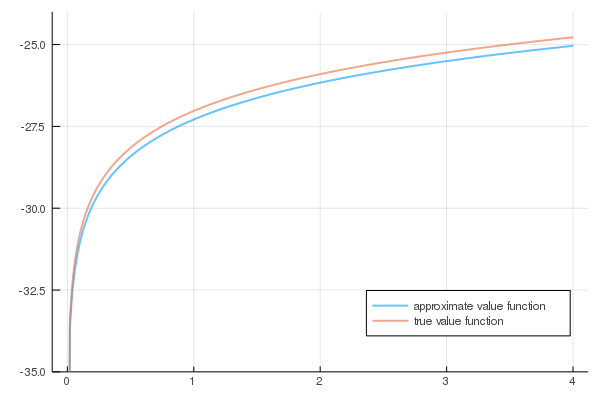

In [11]:
initial_w = 5 * log.(grid_y)
v_star_approx = solve_optgrowth(initial_w)

plt = plot(ylim = (-35, -24))
plot!(plt, grid_y, v_star_approx, linewidth = 2, alpha = 0.6,
      label = "approximate value function")
plot!(plt, v_star, grid_y, linewidth = 2, alpha = 0.6, label = "true value function")
plot!(plt, legend = :bottomright)

A figura mostra que estamos bastante próximos.

### A Função de Política


<a id='index-8'></a>
Para calcular uma política ótima aproximada, pegamos a função de valor aproximado que acabamos de calcular e depois calculamos a política gananciosa correspondente.

A figura a seguir compara o resultado com a solução exata, que, como mencionado acima, é $ \sigma(y) = (1 - \alpha \beta) y $.

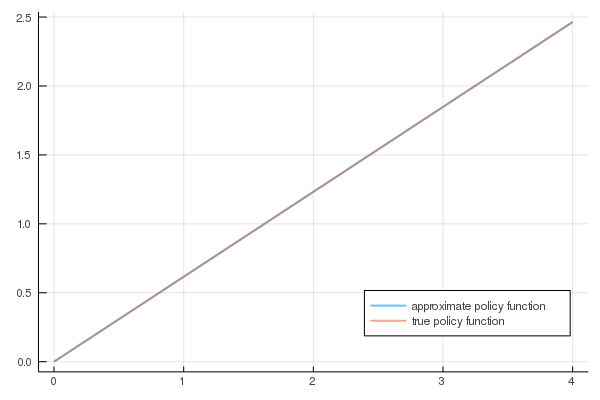

In [12]:
Tw, σ = T(v_star_approx, grid_y, β, log, k -> k^α, shocks;
                         compute_policy = true)
cstar = (1 - α * β) * grid_y

plt = plot(grid_y, σ, lw=2, alpha=0.6, label = "approximate policy function")
plot!(plt, grid_y, cstar, lw = 2, alpha = 0.6, label = "true policy function")
plot!(plt, legend = :bottomright)

A figura mostra que fizemos um bom trabalho nesse caso, aproximando a verdadeira política.

## Exercícios

### Exercício 1

Uma vez que uma política de consumo ideal $ \sigma $ é dada, a renda segue [(5)](#equation-firstp0-og2).

A figura a seguir mostra uma simulação de 100 elementos dessa sequência para três fatores de desconto diferentes (e, portanto, três políticas diferentes).

<img src="https://julia.quantecon.org/dynamic_programming/_static/figures/solution_og_ex2.png" style="width:70%;">
  
Em cada sequência, a condição inicial é  $ y_0 = 0.1 $.

Os fatores de descontos são `discount_factors = (0.8, 0.9, 0.98)`.

Também marcamos um pouco os choques.

In [13]:
s = 0.05
shocks = exp.(μ .+ s * randn(shock_size))

Caso contrário, os parâmetros e as primitivas são os mesmos do modelo logarítmico discutido anteriormente na aula.

Observe que mais agentes pacientes geralmente têm maior riqueza.

Replicar a aleatoriedade do módulo de figura.

## Soluções

### Exercício 1

Aqui está uma solução (assumindo como de costume que você executou tudo acima).

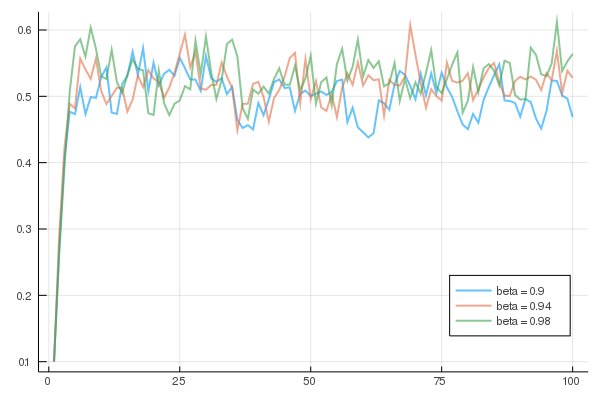

In [14]:
function simulate_og(σ, y0 = 0.1, ts_length=100)
    y = zeros(ts_length)
    ξ = randn(ts_length-1)
    y[1] = y0
    for t in 1:(ts_length-1)
        y[t+1] = (y[t] - σ(y[t]))^α * exp(μ + s * ξ[t])
    end
    return y
end

plt = plot()

for β in (0.9, 0.94, 0.98)
    Tw = similar(grid_y)
    initial_w = 5 * log.(grid_y)

    v_star_approx = fixedpoint(w -> T(w, grid_y, β, u, f, shocks, Tw),
                               initial_w).zero
    Tw, σ = T(v_star_approx, grid_y, β, log, k -> k^α, shocks,
                             compute_policy = true)
    σ_func = LinearInterpolation(grid_y, σ)
    y = simulate_og(σ_func)

    plot!(plt, y, lw = 2, alpha = 0.6, label = label = "beta = $β")
end

plot!(plt, legend = :bottomright)